In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_model(width, height, channel) :
  model = Sequential()

  model.add(Conv2D(
      filters = 16,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
      input_shape = (width, height, channel)
  ))
  model.add(Conv2D(
      filters = 16,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
  ))
  model.add(MaxPooling2D(
      pool_size=(2,2),
      padding='same'
  ))

  model.add(Conv2D(
      filters = 32,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
  ))
  model.add(MaxPooling2D(
      pool_size=(2,2),
      padding='same'
  ))

  model.add(Conv2D(
      filters = 64,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
  ))
  model.add(AveragePooling2D(
      pool_size=(8,8),
      padding='same'
  ))

  model.add(Flatten())
  model.add(Dense(
      units=640,
      activation='relu'
  ))
  model.add(Dense(
      units=10,
      activation='softmax'
  ))

  opt = Adam(learning_rate=0.001)
  model.compile(
      optimizer=opt,
      loss=scc,
      metrics=['accuracy']
  )

  return model

In [3]:
def data_preprocessing() :
  (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

  mean=[0,0,0]
  std=[0,0,0]
  newX_train = np.ones(X_train.shape)
  newX_test = np.ones(X_test.shape)

  for i in range(3) :
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
  
  for i in range(3) :
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
  
  X_train = newX_train
  X_test = newX_test

  return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

model = build_model(X_train.shape[1], X_train.shape[2], X_train.shape[3])

hist = model.fit(
    X_train, 
    Y_train,
    batch_size = 32,
    epochs = 20,
    verbose = 1,
    shuffle=True,
    validation_split=0.1
)

model.evaluate(
    X_test,
    Y_test,
    verbose = 1
)

170500096/170498071 [==============================] - 4s 0us/step
Epoch 1/20
1407/1407 [==============================] - 95s 67ms/step - loss: 1.6076 - accuracy: 0.4107 - val_loss: 1.3213 - val_accuracy: 0.5118
Epoch 2/20
1407/1407 [==============================] - 97s 69ms/step - loss: 1.1997 - accuracy: 0.5682 - val_loss: 1.0527 - val_accuracy: 0.6280
Epoch 3/20
1407/1407 [==============================] - 95s 68ms/step - loss: 1.0297 - accuracy: 0.6352 - val_loss: 0.9990 - val_accuracy: 0.6568
Epoch 4/20
1407/1407 [==============================] - 95s 67ms/step - loss: 0.9267 - accuracy: 0.6732 - val_loss: 0.8972 - val_accuracy: 0.6842
Epoch 5/20
1407/1407 [==============================] - 96s 69ms/step - loss: 0.8481 - accuracy: 0.7004 - val_loss: 0.8973 - val_accuracy: 0.6838
Epoch 6/20
1407/1407 [==============================] - 96s 68ms/step - loss: 0.7855 - accuracy: 0.7218 - val_loss: 0.8280 - val_accuracy: 0.7168
Epoch 7/20
1407/1407 [==============================] - 9

[0.8864904046058655, 0.7358999848365784]

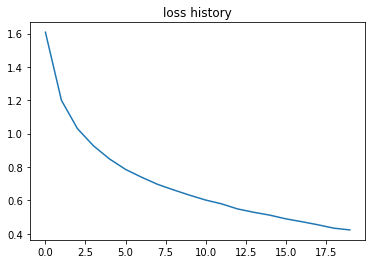

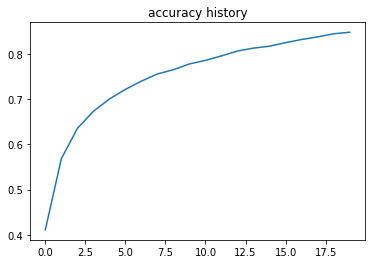

In [4]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("accuracy history")
plt.show()